# load packages and dataset

In [41]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import scanpy as sc
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mplx
from anndata import AnnData, read_h5ad
import singlecellmultiomics.bamProcessing.bamToRNACounts

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_7859/4044060535.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
sc.settings.set_figure_params(dpi=100)



In [3]:
table = pd.read_csv('compM_mm10geneStarts_clustered.bed', sep = '\t')

In [4]:
table['ensembl'] = [ob for ob in table['name'].str.split('.', expand = True)[0]]

In [5]:
table

,#chrom,start,end,name,score,strand,thickStart,thickEnd,itemRGB,blockCount,blockSizes,blockStart,deepTools_group,ensembl
0,14,5894001,5904001,ENSMUSG00000079379.2,0.0,-,5894001,5904001,0,1,10000,5893996,cluster_1,ENSMUSG00000079379
1,14,6884962,6894962,ENSMUSG00000090691.3,0.0,-,6884962,6894962,0,1,10000,6884956,cluster_1,ENSMUSG00000090691
2,1,19203913,19213913,ENSMUSG00000025927.13,0.0,+,19203913,19213913,0,1,10000,19203912,cluster_1,ENSMUSG00000025927
3,8,57327117,57337117,ENSMUSG00000097910.2,0.0,+,57327117,57337117,0,1,10000,57327112,cluster_1,ENSMUSG00000097910
4,8,57329585,57339585,ENSMUSG00000109697.1,0.0,-,57329585,57339585,0,1,10000,57329580,cluster_1,ENSMUSG00000109697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49265,2,167276777,167286777,ENSMUSG00000083661.1,0.0,-,167276777,167286777,0,1,10000,167276776,cluster_4,ENSMUSG00000083661
49266,18,82697431,82707431,ENSMUSG00000117824.1,0.0,+,82697431,82707431,0,1,10000,82697423,cluster_4,ENSMUSG00000117824
49267,7,7561786,7571786,ENSMUSG00000096691.1,0.0,-,7561786,7571786,0,1,10000,7561779,cluster_4,ENSMUSG00000096691
49268,15,3110608,3120608,ENSMUSG00000115502.1,0.0,+,3110608,3120608,0,1,10000,3110605,cluster_4,ENSMUSG00000115502


In [6]:
conversion_table = singlecellmultiomics.bamProcessing.bamToRNACounts.get_gene_id_to_gene_name_conversion_table('/Users/m.blotenburg/Documents/Projects/Helena/standard_files/exons.gtf.gz')

In [7]:
table['genes'] = np.array([conversion_table.get(x,x) for x in table['ensembl']])

In [8]:
table[['deepTools_group','genes']]

,deepTools_group,genes
0,cluster_1,Gm3242
1,cluster_1,Gm3667
2,cluster_1,Tfap2b
3,cluster_1,5033428I22Rik
4,cluster_1,Gm34030
...,...,...
49265,cluster_4,Gm11473
49266,cluster_4,ENSMUSG00000117824
49267,cluster_4,Vmn2r33
49268,cluster_4,Gm49222


In [9]:
cluster1 = list(table[table['deepTools_group'] =='cluster_1']['genes'])
cluster2 = list(table[table['deepTools_group'] =='cluster_2']['genes'])
cluster3 = list(table[table['deepTools_group'] =='cluster_3']['genes'])
cluster4 = list(table[table['deepTools_group'] =='cluster_4']['genes'])
allgenes = list(table['genes'])

In [10]:
print(len(cluster1), len(cluster1)/len(allgenes))
print(len(cluster2), len(cluster2)/len(allgenes))
print(len(cluster3), len(cluster3)/len(allgenes))
print(len(cluster4), len(cluster4)/len(allgenes))
print(len(allgenes), len(allgenes)/len(allgenes))

7983 0.1620255733712198
11065 0.22457885122792776
16206 0.3289222650700223
14016 0.2844733103308301
49270 1.0


In [11]:
go_cluster1 = sc.queries.enrich({'cluster1':cluster1,
                   'all':allgenes}, org="mmusculus")

In [12]:
go_cluster1.head(5)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,TF,TF:M00716,Factor: ZF5; motif: GSGCGCGR,2.524101e-119,True,Factor: ZF5; motif: GSGCGCGR,14870,19265,13644,21866,0.708227,0.917552,all,[TF:M00000]
1,TF,TF:M00716_1,Factor: ZF5; motif: GSGCGCGR; match class: 1,1.361702e-114,True,Factor: ZF5; motif: GSGCGCGR; match class: 1,12095,19265,11205,21866,0.581625,0.926416,all,[TF:M00716]
2,TF,TF:M01240_1,Factor: BEN; motif: CAGCGRNV; match class: 1,6.191480e-103,True,Factor: BEN; motif: CAGCGRNV; match class: 1,12027,19265,11117,21866,0.577057,0.924337,all,[TF:M01240]
3,TF,TF:M10209_1,Factor: E2F-1; motif: GNGGGCGGGRMN; match clas...,1.435413e-92,True,Factor: E2F-1; motif: GNGGGCGGGRMN; match clas...,10657,19265,9879,21866,0.512795,0.926996,all,[TF:M10209]
4,GO:BP,GO:0048731,system development,1.481087e-92,True,"""The process whose specific outcome is the pro...",4115,4148,1098,27205,0.264706,0.266829,cluster1,"[GO:0007275, GO:0048856]"


In [13]:
go_cluster1.shape

(2759, 14)

In [14]:
go_cluster1[go_cluster1['query'] == 'cluster1'][go_cluster1[go_cluster1['query'] == 'cluster1']['source'] == 'GO:BP'].sort_values(by='p_value')[['name','p_value']][0:20]

,name,p_value
4,system development,1.481087e-92
12,multicellular organism development,5.889360e-80
17,anatomical structure development,6.401046e-77
18,nervous system development,4.753630e-74
20,animal organ development,3.794754e-73
23,developmental process,1.265164e-68
24,neurogenesis,1.489594e-68
28,cell differentiation,5.549501e-67
30,animal organ morphogenesis,1.112918e-66
32,cellular developmental process,2.423606e-66


In [16]:
plot1 = go_cluster1[go_cluster1['query'] == 'cluster1'][go_cluster1[go_cluster1['query'] == 'cluster1']['source'] == 'GO:BP'].sort_values(by='p_value')[['name','p_value']][0:10]
plot1['-log (p-value)'] = np.log10(plot1['p_value'])*-1

In [17]:
plot1['p_value']*-1

4    -1.481087e-92
12   -5.889360e-80
17   -6.401046e-77
18   -4.753630e-74
20   -3.794754e-73
23   -1.265164e-68
24   -1.489594e-68
28   -5.549501e-67
30   -1.112918e-66
32   -2.423606e-66
Name: p_value, dtype: float64

In [18]:
go_cluster2 = sc.queries.enrich({'cluster2':cluster2,
                   'all':allgenes}, org="mmusculus")
go_cluster2.head(5)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,TF,TF:M00716,Factor: ZF5; motif: GSGCGCGR,2.524101e-119,True,Factor: ZF5; motif: GSGCGCGR,14870,19265,13644,21866,0.708227,0.917552,all,[TF:M00000]
1,TF,TF:M00716_1,Factor: ZF5; motif: GSGCGCGR; match class: 1,1.361702e-114,True,Factor: ZF5; motif: GSGCGCGR; match class: 1,12095,19265,11205,21866,0.581625,0.926416,all,[TF:M00716]
2,TF,TF:M01240_1,Factor: BEN; motif: CAGCGRNV; match class: 1,6.191480e-103,True,Factor: BEN; motif: CAGCGRNV; match class: 1,12027,19265,11117,21866,0.577057,0.924337,all,[TF:M01240]
3,TF,TF:M10209_1,Factor: E2F-1; motif: GNGGGCGGGRMN; match clas...,1.435413e-92,True,Factor: E2F-1; motif: GNGGGCGGGRMN; match clas...,10657,19265,9879,21866,0.512795,0.926996,all,[TF:M10209]
4,TF,TF:M04662_1,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,6.844184e-91,True,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,12803,19265,11769,21866,0.610901,0.919238,all,[TF:M04662]


In [19]:
go_cluster2[go_cluster2['source'] == 'TF']

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,TF,TF:M00716,Factor: ZF5; motif: GSGCGCGR,2.524101e-119,True,Factor: ZF5; motif: GSGCGCGR,14870,19265,13644,21866,0.708227,0.917552,all,[TF:M00000]
1,TF,TF:M00716_1,Factor: ZF5; motif: GSGCGCGR; match class: 1,1.361702e-114,True,Factor: ZF5; motif: GSGCGCGR; match class: 1,12095,19265,11205,21866,0.581625,0.926416,all,[TF:M00716]
2,TF,TF:M01240_1,Factor: BEN; motif: CAGCGRNV; match class: 1,6.191480e-103,True,Factor: BEN; motif: CAGCGRNV; match class: 1,12027,19265,11117,21866,0.577057,0.924337,all,[TF:M01240]
3,TF,TF:M10209_1,Factor: E2F-1; motif: GNGGGCGGGRMN; match clas...,1.435413e-92,True,Factor: E2F-1; motif: GNGGGCGGGRMN; match clas...,10657,19265,9879,21866,0.512795,0.926996,all,[TF:M10209]
4,TF,TF:M04662_1,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,6.844184e-91,True,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,12803,19265,11769,21866,0.610901,0.919238,all,[TF:M04662]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,TF,TF:M01125,Factor: Oct-4; motif: YWTTSTNATGCAAAT,4.794151e-02,True,Factor: Oct-4; motif: YWTTSTNATGCAAAT,2974,3170,505,21866,0.159306,0.169805,cluster2,[TF:M00000]
2012,TF,TF:M01837_1,Factor: FKLF; motif: BGGGNGGVMD; match class: 1,4.794973e-02,True,Factor: FKLF; motif: BGGGNGGVMD; match class: 1,987,19265,908,21866,0.047132,0.919959,all,[TF:M01837]
2014,TF,TF:M00244_1,Factor: NGFI-C; motif: WTGCGTGGGYGG; match cla...,4.860259e-02,True,Factor: NGFI-C; motif: WTGCGTGGGYGG; match cla...,1156,19265,1060,21866,0.055022,0.916955,all,[TF:M00244]
2017,TF,TF:M00792,Factor: SMAD; motif: AGACNBCNN,4.909374e-02,True,Factor: SMAD; motif: AGACNBCNN,4929,19265,4422,21866,0.229535,0.897139,all,[TF:M00000]


In [20]:
go_cluster2.shape

(2020, 14)

In [21]:
go_cluster2[go_cluster2['query'] == 'cluster2'][go_cluster2[go_cluster2['query'] == 'cluster2']['source'] == 'GO:BP'].sort_values(by='p_value')['name'][0:20]

77     detection of chemical stimulus involved in sen...
78                        detection of chemical stimulus
80               sensory perception of chemical stimulus
84          G protein-coupled receptor signaling pathway
89     detection of stimulus involved in sensory perc...
92     detection of chemical stimulus involved in sen...
95                                 detection of stimulus
102                          sensory perception of smell
108                                   sensory perception
116                               nervous system process
146                                       system process
442                                 response to chemical
604                                      immune response
658                                  signal transduction
709                                complement activation
740                        defense response to bacterium
780             complement activation, classical pathway
794                            

In [22]:
go_cluster3 = sc.queries.enrich({'cluster3':cluster3,
                   'all':allgenes}, org="mmusculus")
go_cluster3.head(5)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,TF,TF:M00716,Factor: ZF5; motif: GSGCGCGR,2.524101e-119,True,Factor: ZF5; motif: GSGCGCGR,14870,19265,13644,21866,0.708227,0.917552,all,[TF:M00000]
1,TF,TF:M00716_1,Factor: ZF5; motif: GSGCGCGR; match class: 1,1.361702e-114,True,Factor: ZF5; motif: GSGCGCGR; match class: 1,12095,19265,11205,21866,0.581625,0.926416,all,[TF:M00716]
2,TF,TF:M01240_1,Factor: BEN; motif: CAGCGRNV; match class: 1,6.191480e-103,True,Factor: BEN; motif: CAGCGRNV; match class: 1,12027,19265,11117,21866,0.577057,0.924337,all,[TF:M01240]
3,TF,TF:M10209_1,Factor: E2F-1; motif: GNGGGCGGGRMN; match clas...,1.435413e-92,True,Factor: E2F-1; motif: GNGGGCGGGRMN; match clas...,10657,19265,9879,21866,0.512795,0.926996,all,[TF:M10209]
4,TF,TF:M04662_1,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,6.844184e-91,True,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,12803,19265,11769,21866,0.610901,0.919238,all,[TF:M04662]


In [23]:
go_cluster3.shape

(1526, 14)

In [24]:
go_cluster3[go_cluster3['query'] == 'cluster3'][go_cluster3[go_cluster3['query'] == 'cluster3']['source'] == 'GO:BP'].sort_values(by='p_value')['name'][0:20]

134     detection of chemical stimulus involved in sen...
142                        detection of chemical stimulus
144     detection of chemical stimulus involved in sen...
151               sensory perception of chemical stimulus
153                           sensory perception of smell
154     detection of stimulus involved in sensory perc...
172                                 detection of stimulus
230          G protein-coupled receptor signaling pathway
264                                    sensory perception
563                                nervous system process
683                                        system process
798                                   signal transduction
974                                             signaling
1127                                   cell communication
1194                                 response to chemical
1226                        cellular response to stimulus
1305                                 response to stimulus
1449          

In [25]:
go_cluster4 = sc.queries.enrich({'cluster4':cluster4,
                   'all':allgenes}, org="mmusculus")
go_cluster4.head(5)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,TF,TF:M10209,Factor: E2F-1; motif: GNGGGCGGGRMN,5.457647e-273,True,Factor: E2F-1; motif: GNGGGCGGGRMN,14275,6524,5363,21866,0.822042,0.375692,cluster4,[TF:M00000]
1,TF,TF:M01981_1,Factor: ELK-1; motif: ACCGGAWRTN; match class: 1,2.056652e-272,True,Factor: ELK-1; motif: ACCGGAWRTN; match class: 1,9036,6524,3882,21866,0.595034,0.429615,cluster4,[TF:M01981]
2,TF,TF:M04662_1,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,3.887768e-265,True,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,12803,6524,4961,21866,0.760423,0.387487,cluster4,[TF:M04662]
3,TF,TF:M00716,Factor: ZF5; motif: GSGCGCGR,3.897916e-265,True,Factor: ZF5; motif: GSGCGCGR,14870,6524,5497,21866,0.842581,0.369670,cluster4,[TF:M00000]
4,TF,TF:M01991,Factor: PEA3; motif: RCCGGAAGYN,1.439980e-260,True,Factor: PEA3; motif: RCCGGAAGYN,9979,6524,4144,21866,0.635193,0.415272,cluster4,[TF:M00000]


In [26]:
go_cluster4.shape

(3671, 14)

In [27]:
go_cluster4[go_cluster4['query'] == 'cluster4'][go_cluster4[go_cluster4['query'] == 'cluster4']['source'] == 'GO:BP'].sort_values(by='p_value')['name'][0:20]

64                                    metabolic process
73                           cellular metabolic process
75                            primary metabolic process
77                  organic substance metabolic process
80                  nitrogen compound metabolic process
104                     macromolecule metabolic process
108        cellular nitrogen compound metabolic process
158    nucleobase-containing compound metabolic process
160                       heterocycle metabolic process
164        cellular aromatic compound metabolic process
166           organic cyclic compound metabolic process
170                      nucleic acid metabolic process
179                                 DNA damage response
196                              organelle organization
208              organic substance biosynthetic process
212                                biosynthetic process
214                       cellular biosynthetic process
215                                          DNA

In [28]:
annot = sc.queries.biomart_annotations("mmusculus",
                                       ['external_gene_name','gene_biotype', 'go_id'],
                                      ).set_index("external_gene_name")
annot

,gene_biotype,go_id
external_gene_name,,
mt-Tf,Mt_tRNA,GO:0030533
mt-Tf,Mt_tRNA,GO:0006414
mt-Tf,Mt_tRNA,GO:0005739
mt-Rnr1,Mt_rRNA,GO:0003735
mt-Rnr1,Mt_rRNA,GO:0000028
...,...,...
Zer1,protein_coding,GO:0031462
Zer1,protein_coding,GO:0032436
Zer1,protein_coding,GO:0006515


In [29]:
annot = annot[~annot.index.duplicated(keep='first')]

In [30]:
table.index = table['genes']
table

,#chrom,start,end,name,score,strand,thickStart,thickEnd,itemRGB,blockCount,blockSizes,blockStart,deepTools_group,ensembl,genes
genes,,,,,,,,,,,,,,,
Gm3242,14,5894001,5904001,ENSMUSG00000079379.2,0.0,-,5894001,5904001,0,1,10000,5893996,cluster_1,ENSMUSG00000079379,Gm3242
Gm3667,14,6884962,6894962,ENSMUSG00000090691.3,0.0,-,6884962,6894962,0,1,10000,6884956,cluster_1,ENSMUSG00000090691,Gm3667
Tfap2b,1,19203913,19213913,ENSMUSG00000025927.13,0.0,+,19203913,19213913,0,1,10000,19203912,cluster_1,ENSMUSG00000025927,Tfap2b
5033428I22Rik,8,57327117,57337117,ENSMUSG00000097910.2,0.0,+,57327117,57337117,0,1,10000,57327112,cluster_1,ENSMUSG00000097910,5033428I22Rik
Gm34030,8,57329585,57339585,ENSMUSG00000109697.1,0.0,-,57329585,57339585,0,1,10000,57329580,cluster_1,ENSMUSG00000109697,Gm34030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm11473,2,167276777,167286777,ENSMUSG00000083661.1,0.0,-,167276777,167286777,0,1,10000,167276776,cluster_4,ENSMUSG00000083661,Gm11473
ENSMUSG00000117824,18,82697431,82707431,ENSMUSG00000117824.1,0.0,+,82697431,82707431,0,1,10000,82697423,cluster_4,ENSMUSG00000117824,ENSMUSG00000117824
Vmn2r33,7,7561786,7571786,ENSMUSG00000096691.1,0.0,-,7561786,7571786,0,1,10000,7561779,cluster_4,ENSMUSG00000096691,Vmn2r33


In [31]:
table[annot.columns] = annot
table

,#chrom,start,end,name,score,strand,thickStart,thickEnd,itemRGB,blockCount,blockSizes,blockStart,deepTools_group,ensembl,genes,gene_biotype,go_id
genes,,,,,,,,,,,,,,,,,
Gm3242,14,5894001,5904001,ENSMUSG00000079379.2,0.0,-,5894001,5904001,0,1,10000,5893996,cluster_1,ENSMUSG00000079379,Gm3242,unprocessed_pseudogene,NaN
Gm3667,14,6884962,6894962,ENSMUSG00000090691.3,0.0,-,6884962,6894962,0,1,10000,6884956,cluster_1,ENSMUSG00000090691,Gm3667,protein_coding,NaN
Tfap2b,1,19203913,19213913,ENSMUSG00000025927.13,0.0,+,19203913,19213913,0,1,10000,19203912,cluster_1,ENSMUSG00000025927,Tfap2b,protein_coding,GO:0006355
5033428I22Rik,8,57327117,57337117,ENSMUSG00000097910.2,0.0,+,57327117,57337117,0,1,10000,57327112,cluster_1,ENSMUSG00000097910,5033428I22Rik,NaN,NaN
Gm34030,8,57329585,57339585,ENSMUSG00000109697.1,0.0,-,57329585,57339585,0,1,10000,57329580,cluster_1,ENSMUSG00000109697,Gm34030,lncRNA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm11473,2,167276777,167286777,ENSMUSG00000083661.1,0.0,-,167276777,167286777,0,1,10000,167276776,cluster_4,ENSMUSG00000083661,Gm11473,processed_pseudogene,NaN
ENSMUSG00000117824,18,82697431,82707431,ENSMUSG00000117824.1,0.0,+,82697431,82707431,0,1,10000,82697423,cluster_4,ENSMUSG00000117824,ENSMUSG00000117824,NaN,NaN
Vmn2r33,7,7561786,7571786,ENSMUSG00000096691.1,0.0,-,7561786,7571786,0,1,10000,7561779,cluster_4,ENSMUSG00000096691,Vmn2r33,protein_coding,GO:0007186


In [32]:
pd.set_option('display.max_rows', None)
counts_per_biotype = pd.DataFrame(table.value_counts(['deepTools_group','gene_biotype'])).sort_values(by='deepTools_group')
counts_per_biotype = counts_per_biotype.reset_index().rename(columns={0:'counts'})

In [33]:
total_counts = pd.DataFrame(table.value_counts(['gene_biotype'])).rename(columns={0:'total'})

In [34]:
total_cluster_counts = pd.DataFrame(table.value_counts(['deepTools_group'])).rename(columns={0:'total_cluster'})
total_cluster_counts

,total_cluster
deepTools_group,
cluster_3,16206
cluster_4,14016
cluster_2,11065
cluster_1,7983


In [35]:
counts_per_biotype = pd.merge(counts_per_biotype, total_counts, left_on='gene_biotype',right_index=True)
counts_per_biotype = pd.merge(counts_per_biotype, total_cluster_counts, left_on='deepTools_group',right_index=True)

counts_per_biotype['percent'] = counts_per_biotype['counts']/counts_per_biotype['total']
counts_per_biotype['percent_per_cluster'] = counts_per_biotype['counts']/counts_per_biotype['total_cluster']

counts_per_biotype.head(5)

,deepTools_group,gene_biotype,counts,total,total_cluster,percent,percent_per_cluster
0,cluster_1,transcribed_processed_pseudogene,34,223,7983,0.152466,0.004259
1,cluster_1,snoRNA,113,1257,7983,0.089897,0.014155
2,cluster_1,TR_V_pseudogene,7,28,7983,0.250000,0.000877
3,cluster_1,unprocessed_pseudogene,156,1214,7983,0.128501,0.019542
4,cluster_1,snRNA,158,1070,7983,0.147664,0.019792


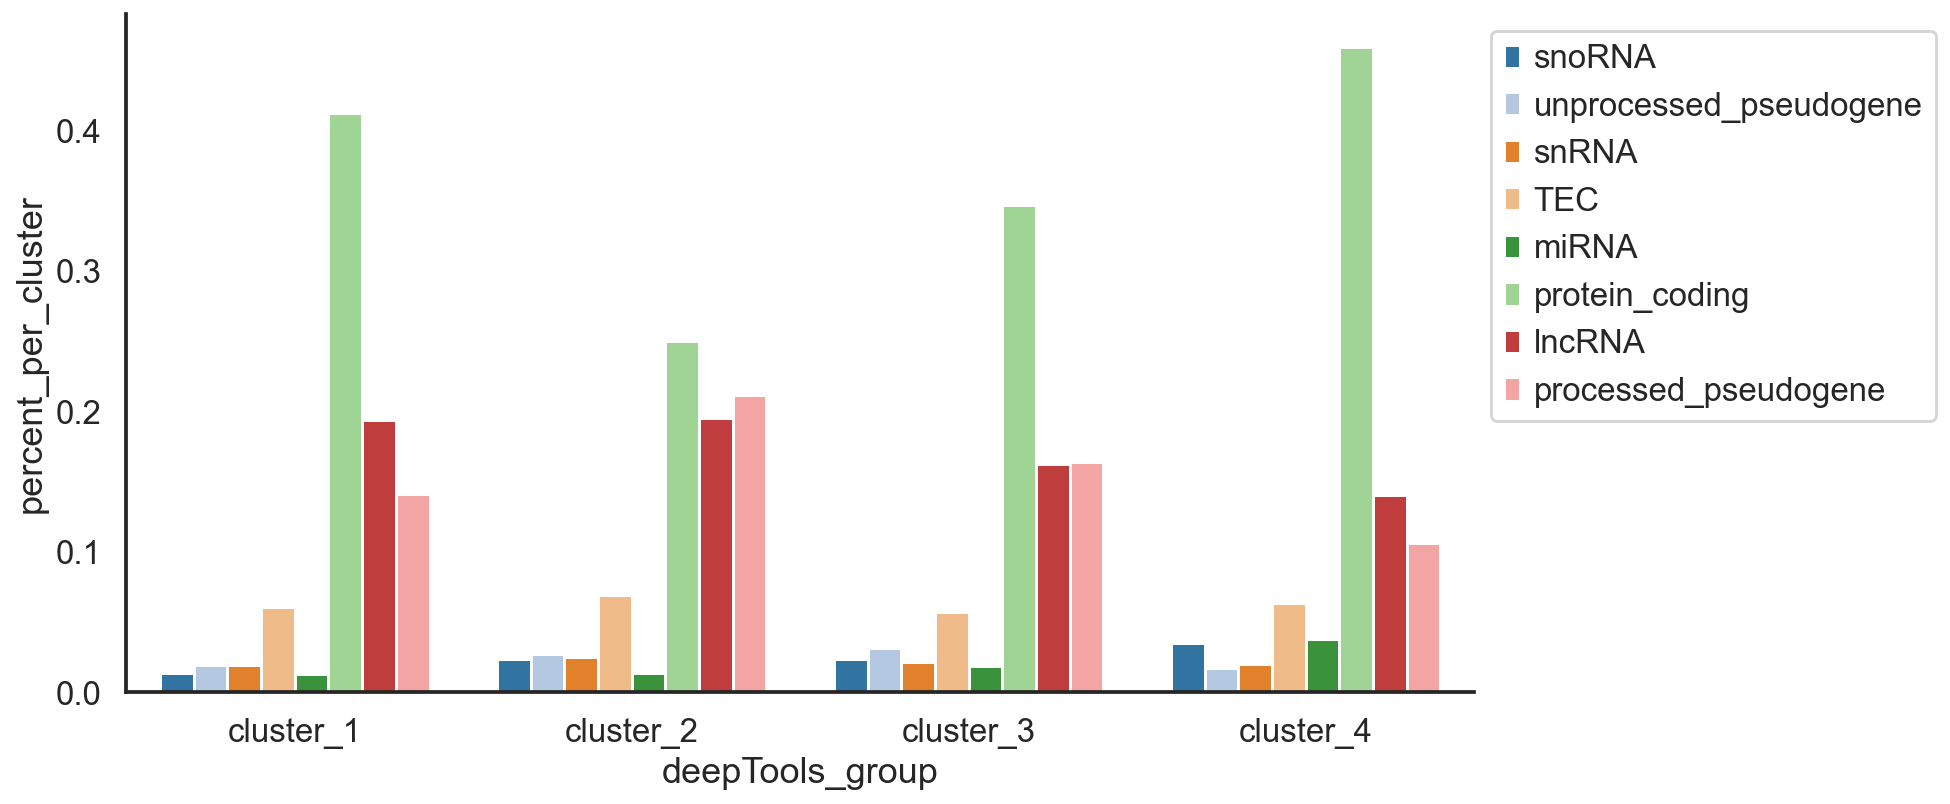

In [42]:
sns.set_style('white')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=counts_per_biotype[counts_per_biotype['percent_per_cluster'] > 0.01], x='deepTools_group',y='percent_per_cluster', hue='gene_biotype',ax=ax, palette = 'tab20')
sns.despine()
ax.legend(bbox_to_anchor=(1, 1))

# plots

Text(0, 0.5, '')

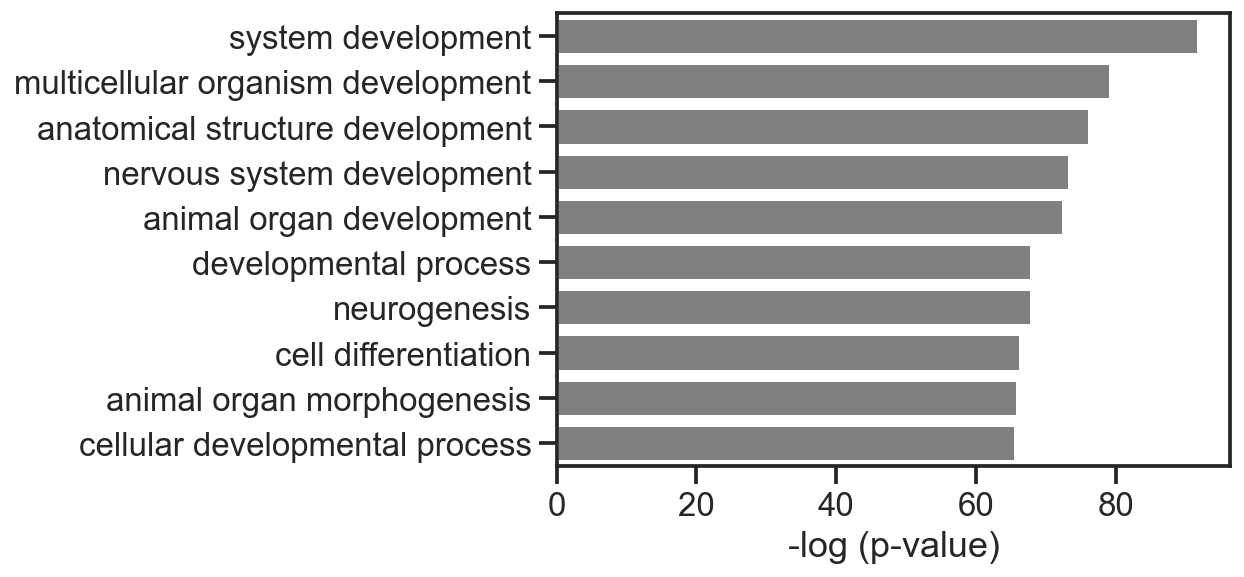

In [43]:
plotcl = go_cluster1
cluster = 'cluster1'

plot1 = plotcl[plotcl['query'] == cluster][plotcl[plotcl['query'] == cluster]['source'] == 'GO:BP'].sort_values(by='p_value')[['name','p_value']][0:10]
plot1['-log (p-value)'] = np.log10(plot1['p_value'])*-1
sns.set_style('ticks')
sns.set_context('talk')
ax = sns.barplot(y=plot1['name'],x=plot1['-log (p-value)'], color = 'grey')
ax.set_ylabel('')
#sns.despine()

Text(0, 0.5, '')

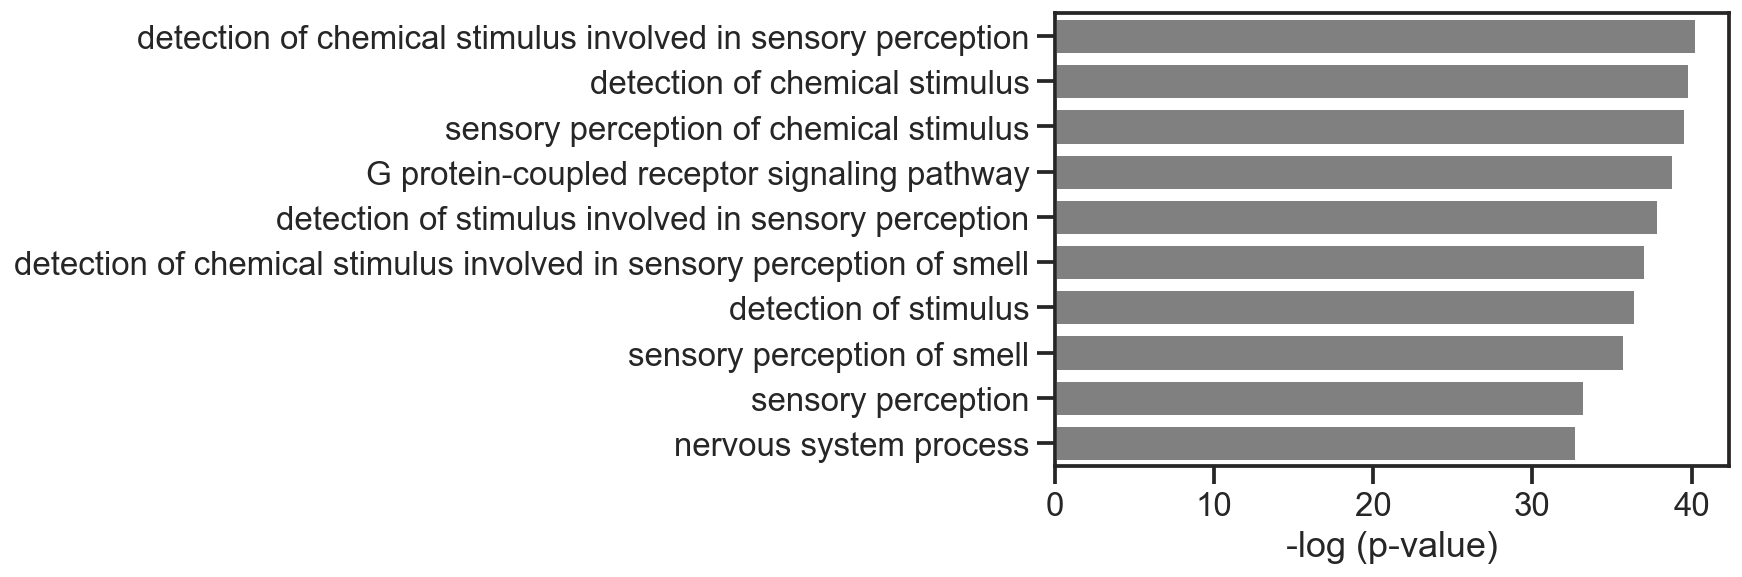

In [44]:
plotcl = go_cluster2
cluster = 'cluster2'

plot1 = plotcl[plotcl['query'] == cluster][plotcl[plotcl['query'] == cluster]['source'] == 'GO:BP'].sort_values(by='p_value')[['name','p_value']][0:10]
plot1['-log (p-value)'] = np.log10(plot1['p_value'])*-1
sns.set_style('ticks')
sns.set_context('talk')
ax = sns.barplot(y=plot1['name'],x=plot1['-log (p-value)'], color = 'grey')
ax.set_ylabel('')
#sns.despine()

Text(0, 0.5, '')

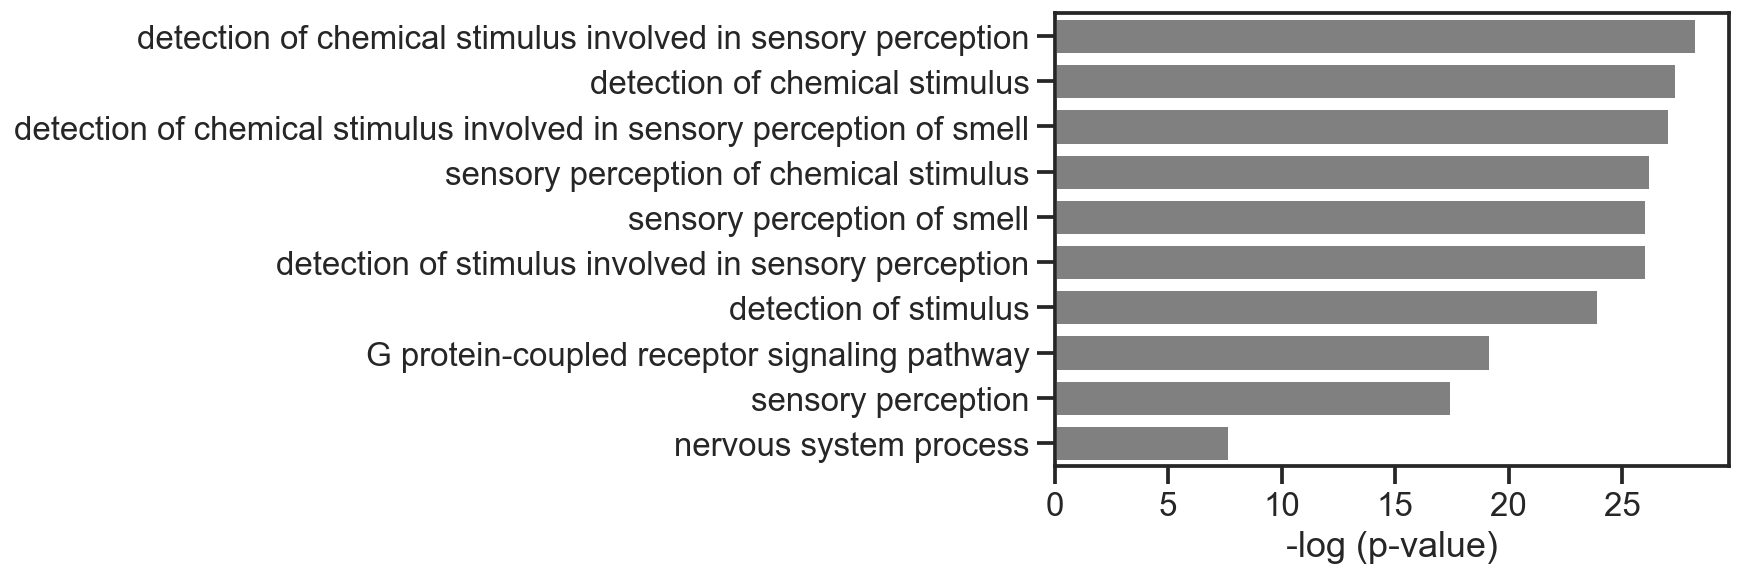

In [45]:
plotcl = go_cluster3
cluster = 'cluster3'

plot1 = plotcl[plotcl['query'] == cluster][plotcl[plotcl['query'] == cluster]['source'] == 'GO:BP'].sort_values(by='p_value')[['name','p_value']][0:10]
plot1['-log (p-value)'] = np.log10(plot1['p_value'])*-1
sns.set_style('ticks')
sns.set_context('talk')
ax = sns.barplot(y=plot1['name'],x=plot1['-log (p-value)'], color = 'grey')
ax.set_ylabel('')
#sns.despine()

Text(0, 0.5, '')

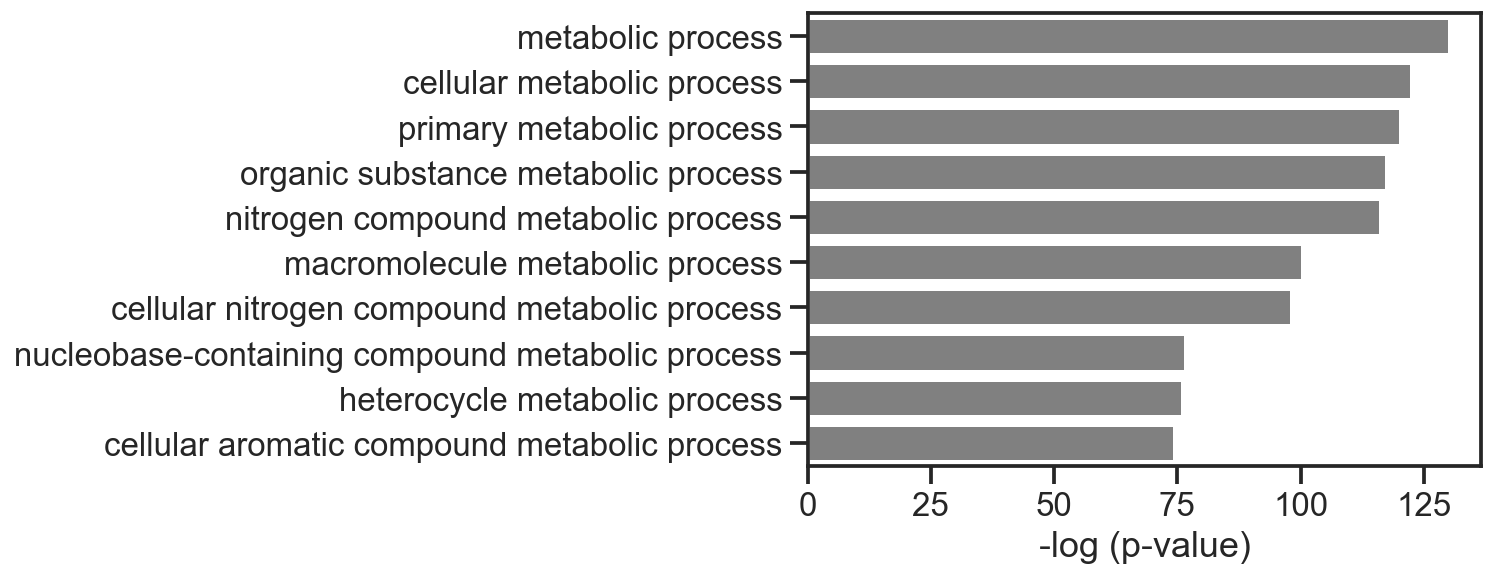

In [46]:
plotcl = go_cluster4
cluster = 'cluster4'

plot1 = plotcl[plotcl['query'] == cluster][plotcl[plotcl['query'] == cluster]['source'] == 'GO:BP'].sort_values(by='p_value')[['name','p_value']][0:10]
plot1['-log (p-value)'] = np.log10(plot1['p_value'])*-1
sns.set_style('ticks')
sns.set_context('talk')
ax = sns.barplot(y=plot1['name'],x=plot1['-log (p-value)'], color = 'grey')
ax.set_ylabel('')
#sns.despine()